In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_intervalos = pd.read_csv("departamentos-en-venta-2020-intervalos.csv")
data_intervalos.head()

,Barrio,Comunas,Ambientes,Trimestre,Pesos,Dolares,PesosM2,DolaresM2,Rango_Pesos,Rango_Dolares,Rango_PesosM2,Rango_DolaresM2
0,ALMAGRO,5,1,SEGUNDO,3513600,54900,206682,3229,<5M,50K - 75K,200K - 500K,"2,5K - 5K"
1,ALMAGRO,5,1,SEGUNDO,3392000,53000,188444,2944,<5M,50K - 75K,150K - 200K,"2,5K - 5K"
2,ALMAGRO,5,1,SEGUNDO,2880000,45000,160000,2500,<5M,<50K,150K - 200K,"2,5K - 5K"
3,ALMAGRO,5,1,SEGUNDO,2624000,41000,145778,2278,<5M,<50K,100K - 150K,"1K - 2,5K"
4,ALMAGRO,5,1,SEGUNDO,3769600,58900,209422,3272,<5M,50K - 75K,200K - 500K,"2,5K - 5K"


## Top 5 de Barrios con mayor valor promedio en Dolares por M2 

In [3]:
top5_mayor_prom_dM2_barrio = pd.DataFrame(data_intervalos['DolaresM2'].groupby(data_intervalos['Barrio'])
                                         .mean().rename('Promedio DolaresM2')
                                         .sort_values(ascending = False).reset_index()).head(5)

In [4]:
top5_mayor_prom_dM2_barrio

,Barrio,Promedio DolaresM2
0,PUERTO MADERO,6536.058116
1,NUÑEZ,3680.729761
2,PALERMO,3652.790878
3,BELGRANO,3569.498612
4,RECOLETA,3304.058697


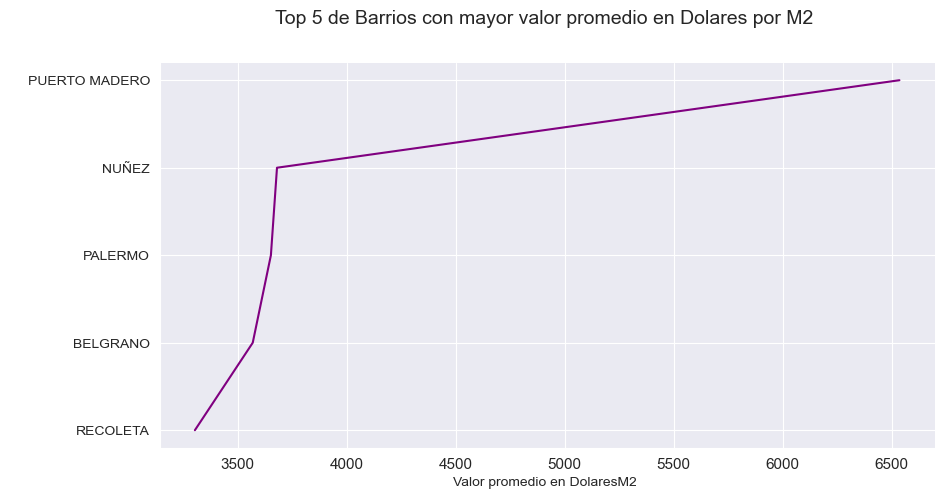

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot(y = top5_mayor_prom_dM2_barrio['Barrio'],
             x = top5_mayor_prom_dM2_barrio['Promedio DolaresM2'],
             color = 'purple',
             data = top5_mayor_prom_dM2_barrio)

plt.title('Top 5 de Barrios con mayor valor promedio en Dolares por M2 ', y=1.08, fontdict={'size':14})
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.ylabel(' ')
plt.xlabel('Valor promedio en DolaresM2 ')

sns.despine()
sns.set_style("darkgrid")
#plt.grid()
plt.show()


## Top 5 de Barrios con menor valor promedio en Dolares por M2 

In [6]:
top5_menor_prom_dM2_barrio = pd.DataFrame(data_intervalos['DolaresM2'].groupby(data_intervalos['Barrio'])
                                         .mean().rename('Promedio DolaresM2')
                                         .sort_values(ascending = False).reset_index()).tail(5)

In [7]:
top5_menor_prom_dM2_barrio

,Barrio,Promedio DolaresM2
46,NUEVA POMPEYA,1766.195067
47,BOCA,1747.663804
48,BARRACAS OESTE,1546.750000
49,VILLA LUGANO,1487.301749
50,VILLA SOLDATI,892.540984


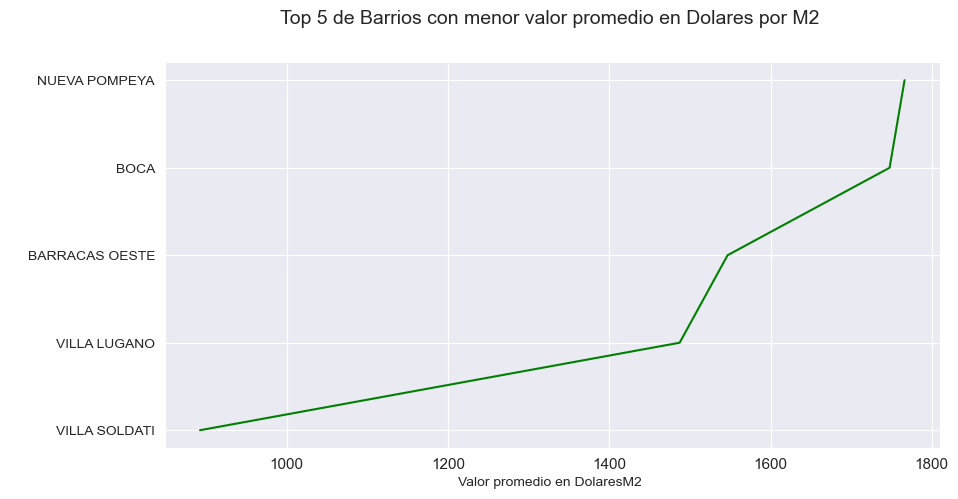

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(y = top5_menor_prom_dM2_barrio['Barrio'],
             x = top5_menor_prom_dM2_barrio['Promedio DolaresM2'],
             color='green',
             data = top5_menor_prom_dM2_barrio)

plt.title('Top 5 de Barrios con menor valor promedio en Dolares por M2 ', y=1.08, fontdict={'size':14})
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.ylabel(' ')
plt.xlabel('Valor promedio en DolaresM2 ')

sns.despine()
sns.set_style("darkgrid")
#plt.grid()
plt.show()


## Cantidad de ambientes y rango de precios

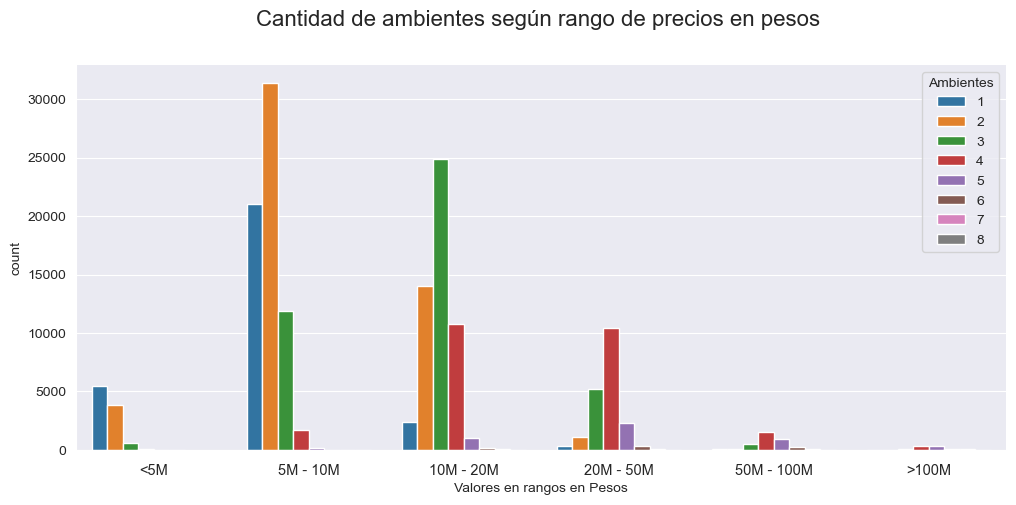

In [9]:
plt.figure(figsize=(12,5))

sns.countplot(x = 'Rango_Pesos',
             data = data_intervalos,
             hue = 'Ambientes'
            
             )

plt.title('Cantidad de ambientes según rango de precios en pesos ', y=1.08, fontdict={'size':16})
plt.xticks(fontsize=10.5, y=-0.01)
plt.yticks(fontsize=10)
plt.xlabel('Valores en rangos en Pesos')

sns.despine()
#plt.grid()
plt.show()

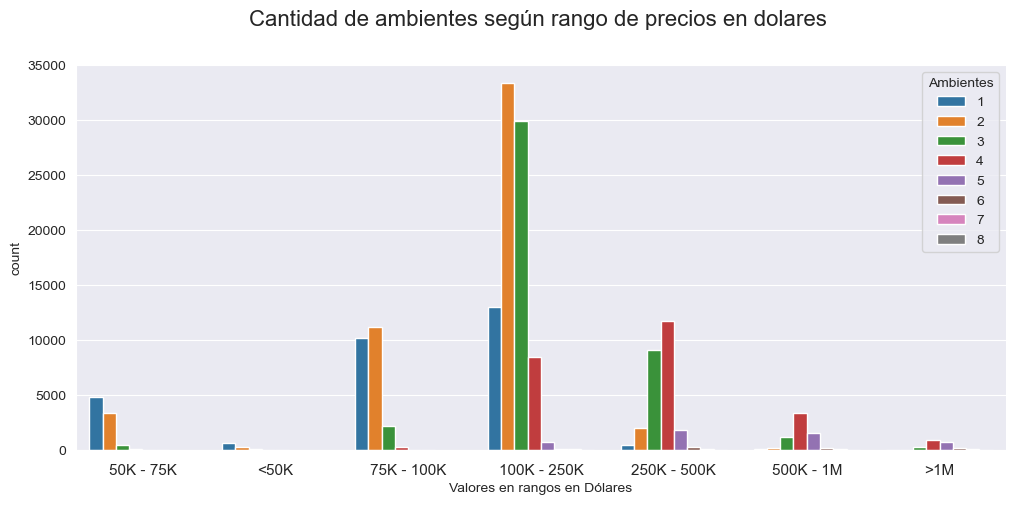

In [10]:
plt.figure(figsize=(12,5))

sns.countplot(x = 'Rango_Dolares',
             data = data_intervalos,
             hue = 'Ambientes'
         
             )

plt.title('Cantidad de ambientes según rango de precios en dolares ', y=1.08, fontdict={'size':16})
plt.xticks(fontsize=11, y=-0.01)
plt.yticks(fontsize=10)
plt.xlabel('Valores en rangos en Dólares')

sns.despine()
#plt.grid()
plt.show()